Episode 5000, Avg Reward (last 100): 0.52, Epsilon: 0.0167


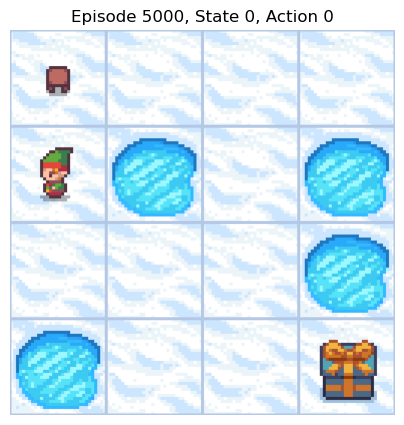

Training completed.
Q-table shape: (16, 4)
Final Q-table (first 5 rows): [[2.62691015e-01 1.00454357e-01 1.73833412e-01 7.00535774e-02]
 [1.83991398e-03 2.00302002e-01 2.42147513e-02 5.61219828e-02]
 [1.22583667e-02 2.57019128e-02 2.72030152e-02 5.13466021e-02]
 [7.27205879e-05 6.38752969e-03 1.04602382e-02 2.75127805e-02]
 [3.66010802e-01 5.08053182e-02 3.61332221e-02 1.12964840e-03]]
Average reward over all episodes: 0.16754262274067427


In [ ]:
import numpy as np
import random
import gym  # or import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Initialize environment and Q-table
env = gym.make('FrozenLake-v1', render_mode='rgb_array')  # Specify render_mode
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
alpha = 0.8  # learning rate
gamma = 0.95  # discount factor
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001
n, max_steps = 5000, 30

rewards = []
epsilon = max_epsilon

# Set up Matplotlib figure for real-time visualization
plt.ion()  # Interactive mode for Jupyter
fig, ax = plt.subplots(figsize=(5, 5))

for episode in range(n):
    # Reset environment
    s = env.reset()
    if isinstance(s, tuple):  # Handle Gymnasium's (state, info) return
        s, _ = s

    total_reward = 0
    for i in range(max_steps):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            a = env.action_space.sample()  # Random action
        else:
            a = np.argmax(q_table[s])  # Best action from Q-table

        # Take action
        step_result = env.step(a)
        s_new, r, done, info = step_result[:4]  # Unpack step result

        # Render environment (every 100 episodes, last step)
        if (episode + 1) % 100 == 0 and i == 0:  # Visualize first step of every 100th episode
            img = env.render()  # Returns RGB array
            ax.clear()
            ax.imshow(img)
            ax.set_title(f"Episode {episode + 1}, State {s}, Action {a}")
            ax.axis('off')
            display(fig)
            clear_output(wait=True)
            time.sleep(0.1)  # Brief pause to show image

        # Update Q-table
        q_table[s][a] = q_table[s][a] + alpha * (r + gamma * np.max(q_table[s_new]) - q_table[s][a])

        # Update state and total reward
        s = s_new
        total_reward += r

        if done:
            rewards.append(total_reward)
            epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
            break

    # If episode ends early, update rewards and epsilon
    if i < max_steps - 1:
        rewards.append(total_reward)
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

    # Print progress every 100 episodes
    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(rewards[-100:])  # Average reward over last 100 episodes
        print(f"Episode {episode + 1}, Avg Reward (last 100): {avg_reward:.2f}, Epsilon: {epsilon:.4f}")

# Close environment and figure
env.close()
plt.ioff()
plt.show()

print("Training completed.")
print("Q-table shape:", q_table.shape)
print("Final Q-table (first 5 rows):", q_table[:5])
print("Average reward over all episodes:", np.mean(rewards))

In [ ]:
import numpy as np
import gymnasium as gym
import random

env = gym.make("FrozenLake-v1", is_slippery=False,render_mode='human')
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

num_episodes = 10
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()[0]  # env.reset() might return a tuple, use [0] to get the state
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()

        # Step the environment
        new_state, reward, done, truncated, info = env.step(action)  # Accepting 'truncated' as an additional return value

        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done or truncated:
            break

    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    rewards_all_episodes.append(rewards_current_episode)

print("Q-Table")
print(q_table)

Q-Table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
